## Matplotlib

<div class="alert alert-info">
<b>Exercise 12</b><br>
a) Plot y1, y2 against the time. t = np.linspace(0,100,1000), y1 = t+(5/t+1), y2 = t&lowast;&lowast;0.8<br>
b) Fill between y1 and y2.<br>
c) Plot y as bar plot. y = [10,7.25,8.3,3.9,5]<br>
d) Plot y against the time as a scatter plot. t = np.linspace(0,10,100), y = t&lowast;&lowast;3 + 100&lowast;np.random.randn(len(t))<br>
e) Plot a histogram of n. n = np.random.normal(0,701,100)
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
t = np.linspace(0,100,1000)

In [3]:
y1 = t+(5/(t+1))
y2 = t**0.8

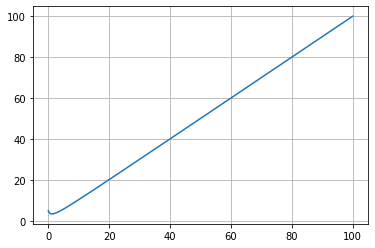

In [4]:
plt.plot(t,y1)
plt.grid()

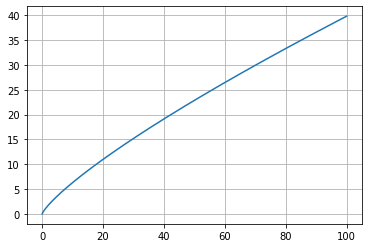

In [5]:
plt.plot(t,y2)
plt.grid()

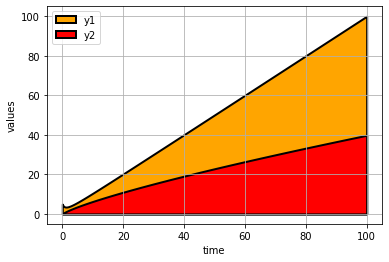

In [6]:
plt.fill_between(t,y1, color="orange",label="y1",alpha=1,edgecolor="black", linewidth=2)
plt.fill_between(t,y2, color="red",label="y2",alpha=1, edgecolor="black", linewidth=2)
plt.legend(loc="upper left")
plt.xlabel("time")
plt.ylabel("values")
plt.grid()

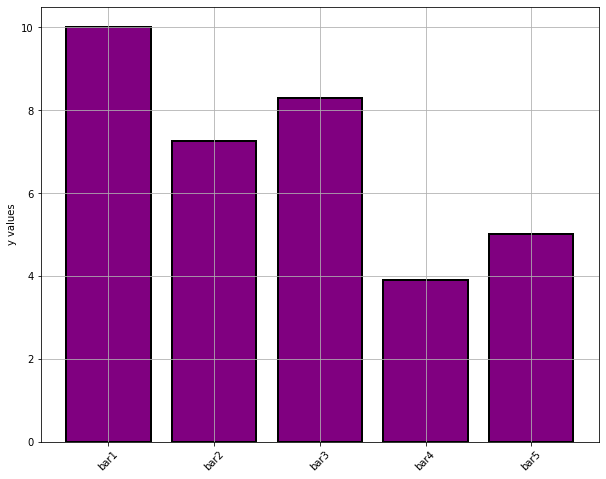

In [7]:
plt.figure(figsize=(10,8))
y = [10,7.25,8.3,3.9,5]
plt.bar(x=range(len(y)),height=y, edgecolor="black", linewidth=2, color="purple")
plt.xticks(ticks=[0,1,2,3,4],labels=['bar1','bar2','bar3','bar4','bar5'], rotation=45)
plt.ylabel('y values')
plt.grid()

In [8]:
t = np.linspace(0,10,100)
y = t**3 + 100*np.random.randn(len(t))

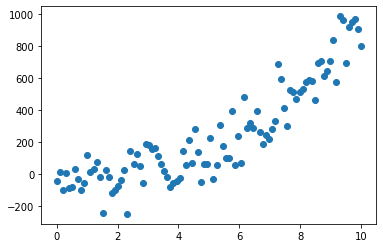

In [9]:
plt.scatter(x=t,y=y)

In [10]:
n = np.random.normal(0,701,100)

(array([ 2.,  3., 18., 20., 12., 19., 19.,  4.,  2.,  1.]),
 array([-1872.78524905, -1459.29959417, -1045.81393929,  -632.32828441,
         -218.84262953,   194.64302535,   608.12868023,  1021.61433511,
         1435.09998998,  1848.58564486,  2262.07129974]),
 <BarContainer object of 10 artists>)

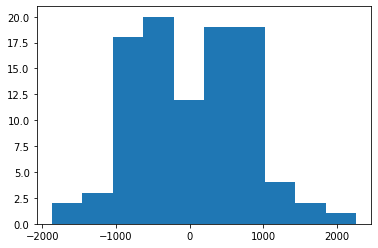

In [11]:
plt.hist(n)

<div class="alert alert-info">
<b>Exercise 13</b><br>
dataset = 'data/wine.csv'<br>
<br>
a) Visualize the malic_acid content (x) vs. proline (y).<br>
b) Repeat this, but this time, seperate the wine_types by color.<br>
c) Separate the different wines by color if the proline content is higher than 800.<br>
&lowast;) Play around with the data and visualization tools.
</div>

In [12]:
df = pd.read_csv("../../data/wine.csv")
df.head()

,abv,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyacins,color,hue,dilution,proline,wine_type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


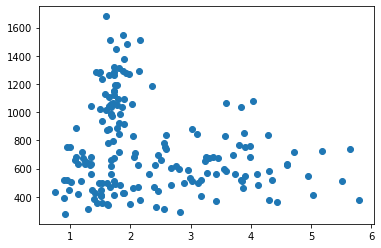

In [13]:
malic_acid = df['malic_acid']
proline = df['proline']
plt.scatter(x=malic_acid,y=proline)

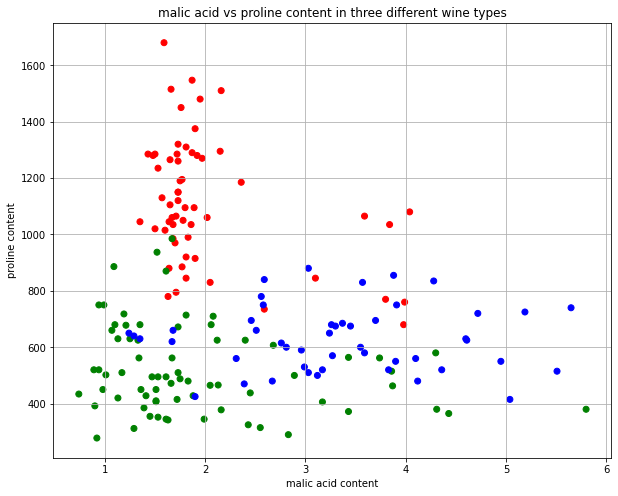

In [14]:
plt.figure(figsize=(10,8))
colors = {1:'red',2:'green',3:'blue'}
plt.scatter(x=df['malic_acid'],y=df['proline'],c=df['wine_type'].map(colors))
plt.ylabel('proline content')
plt.xlabel('malic acid content')
plt.title('malic acid vs proline content in three different wine types')
plt.grid()

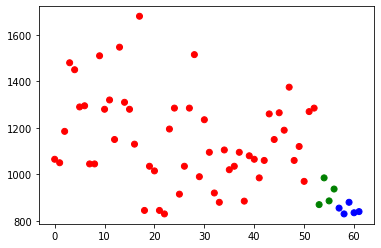

In [15]:
df1 = df[df['proline'] > 800]
plt.scatter(x=range(len(df1)),y=df1['proline'], c=df1['wine_type'].map(colors))

In [16]:
wines = pd.Series(df[df['proline'] > 800]['wine_type'], index=df[df['proline'] > 800].index)
colorless = pd.Series(4, index=df[df['proline'] <= 800].index)

cond_column = pd.concat([wines,colorless])

In [17]:
df['cond_column'] = cond_column
df.head()

,abv,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyacins,color,hue,dilution,proline,wine_type,cond_column
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,4


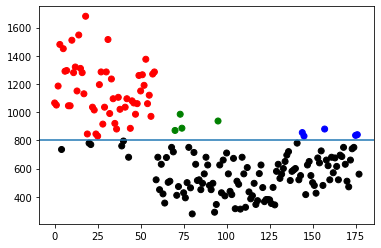

In [18]:
colors = {1:'red',2:'green',3:'blue',4:'black'}
plt.scatter(x=range(len(df)),y=df['proline'], c=df['cond_column'].map(colors))
plt.axhline(800)